In [74]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, rcParams
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
rcParams['figure.figsize'] = 11,10
import joblib
link = '../Datasets/hit400Dataset.csv'

In [118]:
df = pd.read_csv(link)

#  EXPLORATORY DATA ANALYSIS
> a basic overview of the dataset, its features and statistics including data types

In [76]:
df.head()

,amount,account_age,holder_age,account_balance,transaction_time,entry_type,gender,broswer,avs,cvv,connection_type,card_number,account_type,location,bank,label
0,7025,4030,53,1230,5,magnetic strip,female,Mozilla/5.0,n,6348,https,465,debit,Bulawayo,First Capital Bank,True
1,4438,5587,47,1663,10,online,male,Chrome/41.0.2272.89,y,2744,http,681,debit,Harare,Agribank,False
2,5271,7440,24,1602,10,online,female,lk/41.0.2272.89,n,5105,https,262,debit,Bulawayo,Steward Bank,True
3,7878,5776,51,2808,1,chip,female,Mozilla/5.0,y,2369,http,552,debit,Harare,BANC ABC,False
4,1339,6597,52,4526,10,chip,female,Chrome/41.0.2272.89,y,6225,https,297,debit,Rusape,Agribank,False


In [77]:
df.info()
#checking feature data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34978 entries, 0 to 34977
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   amount            34978 non-null  int64 
 1   account_age       34978 non-null  int64 
 2   holder_age        34978 non-null  int64 
 3   account_balance   34978 non-null  int64 
 4   transaction_time  34978 non-null  int64 
 5   entry_type        34978 non-null  object
 6   gender            34978 non-null  object
 7   broswer           34978 non-null  object
 8   avs               34978 non-null  object
 9   cvv               34978 non-null  int64 
 10  connection_type   34978 non-null  object
 11  card_number       34978 non-null  int64 
 12  account_type      34978 non-null  object
 13  location          34978 non-null  object
 14  bank              34978 non-null  object
 15  label             34978 non-null  bool  
dtypes: bool(1), int64(7), object(8)
memory usage: 4.0+ MB


# CHECKING FOR MISSING VALUES
> most machine learning algorithms can not handle missing values, so we have to identify them and fill them out

In [78]:
df.isnull().sum()
#checking for missing values

amount              0
account_age         0
holder_age          0
account_balance     0
transaction_time    0
entry_type          0
gender              0
broswer             0
avs                 0
cvv                 0
connection_type     0
card_number         0
account_type        0
location            0
bank                0
label               0
dtype: int64

# CHECKING CATAGORICAL VALUES DISTRUBUTION
>understanding the distrubution of catagorical values in catagorical features

In [79]:
 df['bank'].value_counts()
#checking the distrubuting of catagories in the bank attributes

Agribank              13571
FBC Bank               4614
Steward Bank           4478
BANC ABC               4371
CBZ Bank               4061
First Capital Bank     3883
Name: bank, dtype: int64

In [80]:
 df['account_type'].value_counts()
    #checking the distrubution of catagories in the card type attributes

debit     18300
credit    16678
Name: account_type, dtype: int64

In [81]:
 df['entry_type'].value_counts()
    #checking the distrubution of catagories in the location attributes

online            13993
chip              13255
magnetic strip     7730
Name: entry_type, dtype: int64

# DATA VISUALISATION
>making use of graphhs to further explore the dataset, identify relationships and trends

c:\users\nyasha chizampeni\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


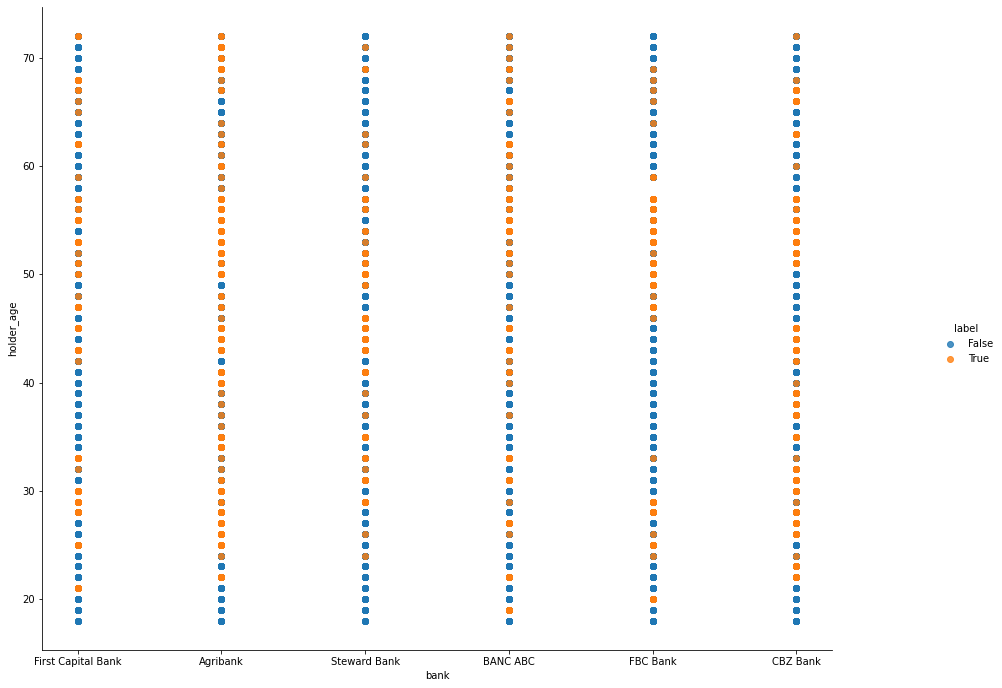

In [82]:
#data visualisation
sns.lmplot('bank', 'holder_age', df, hue='label', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

c:\users\nyasha chizampeni\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


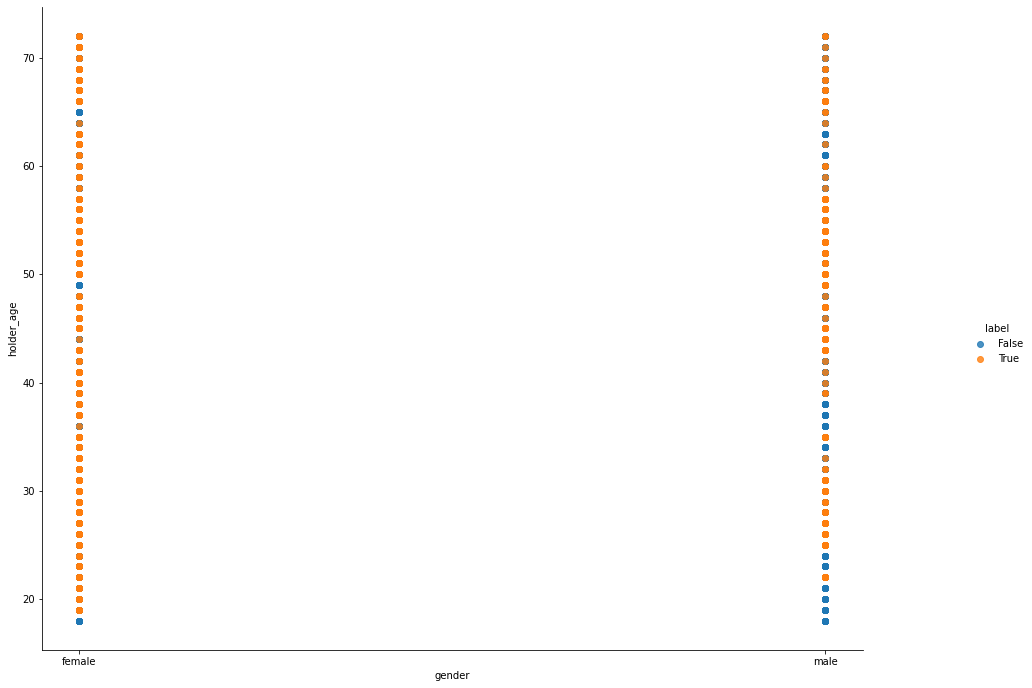

In [83]:
#data visualisation
sns.lmplot('gender', 'holder_age', df, hue='label', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

c:\users\nyasha chizampeni\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


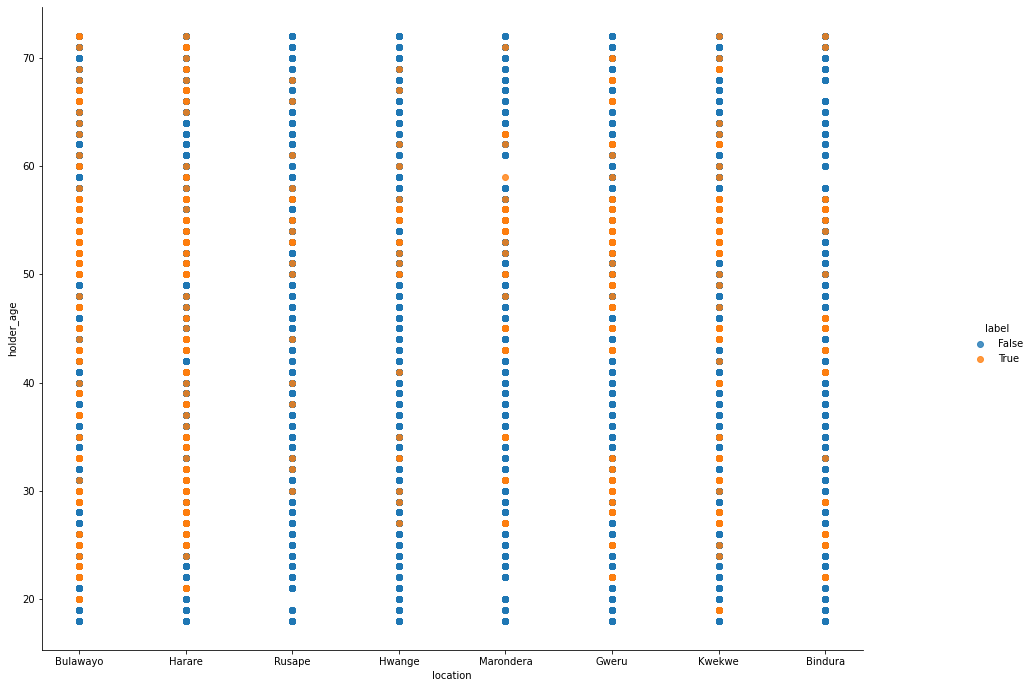

In [84]:
#data visualisation
sns.lmplot('location', 'holder_age', df, hue='label', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

c:\users\nyasha chizampeni\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


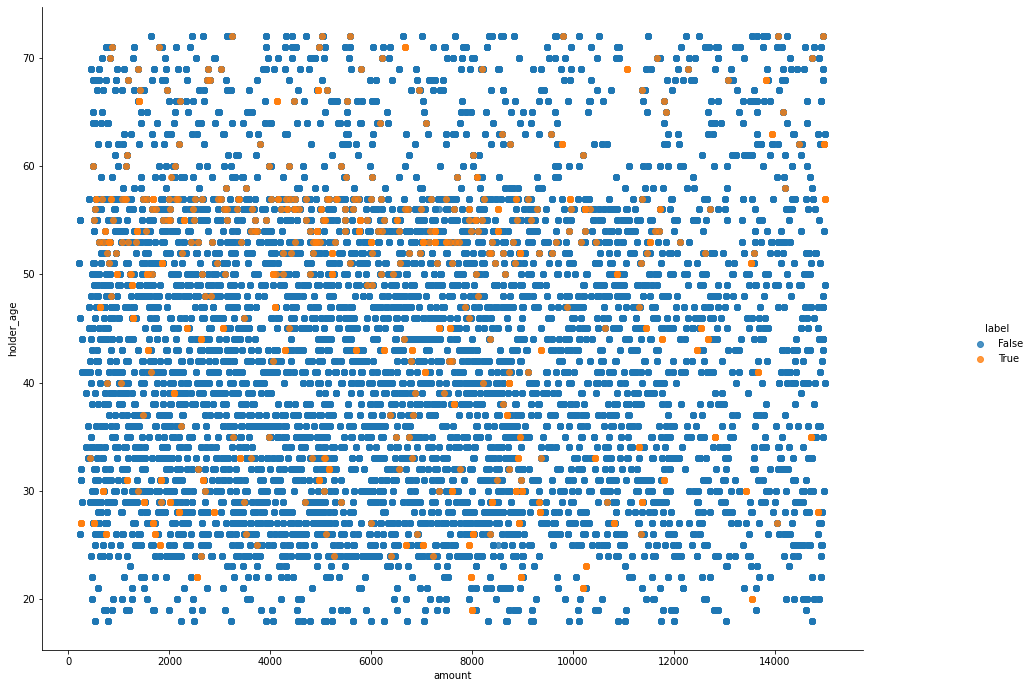

In [85]:
#data visualisation
sns.lmplot('amount', 'holder_age', df, hue='label', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

c:\users\nyasha chizampeni\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


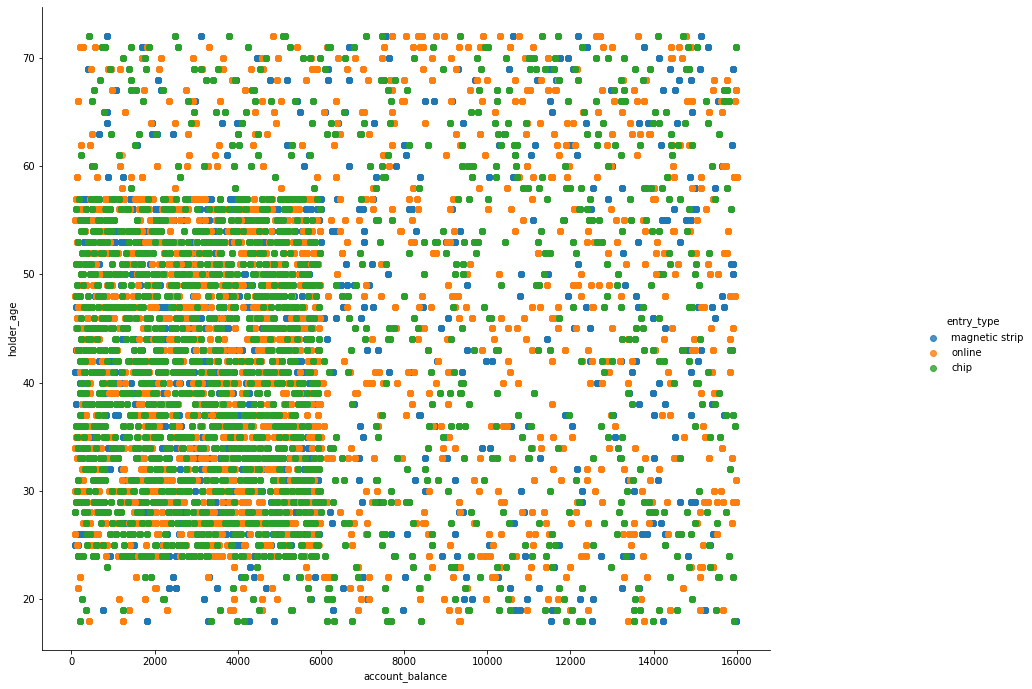

In [86]:
#data visualisation
sns.lmplot('account_balance', 'holder_age', df, hue='entry_type', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [119]:
df['label'].value_counts()
#checking the distrubution of catagories in the data label

False    32955
True      2045
Name: label, dtype: int64

In [88]:
matrix = df.corr()

In [89]:
#checking the correlation of features with respect to the label
matrix['label'].sort_values(ascending=False)

label               1.000000
cvv                 0.030607
holder_age          0.028610
account_age         0.006740
transaction_time    0.003833
card_number         0.000571
amount             -0.010114
account_balance    -0.017239
Name: label, dtype: float64

# CHECKING THE CORRELATION BETWEE FEATURES
>high corelated features are redundant and contribute very little the overal model performance, they need to be removed or processed further

<AxesSubplot:>

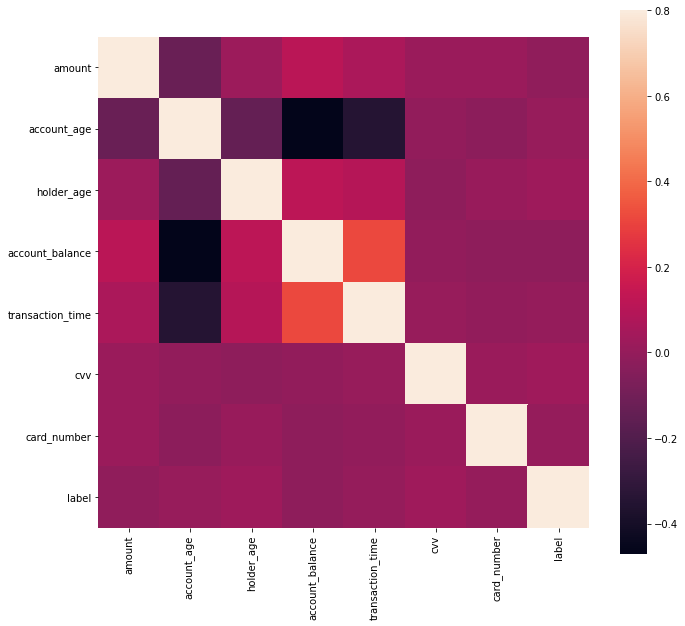

In [90]:
#plotting a correlation heat map
sns.heatmap(matrix, vmax=0.8, square=True)

# CALCULATING THE OUTLIER FRACTION

In [112]:
#defing the outlier fraction for the local Outlier Facto r algorithm
fraud = df[df['label'] == 1]
normal = df[df['label'] == 0]
outlier_fraction =  len(fraud) / float(len(normal))
outlier_fraction

0.05876845951741008

# IMPORTING CRITICAL PACKAGES

In [94]:
from river import compose
from river import preprocessing
from river import linear_model
from river import metrics
from river import tree
from river import neighbors
from river import ensemble
from river import stream

#  INITIALIZING CLASSIFICATION ALGORITHMS AND CREATING PIPELINES 

In [95]:
import river
model1 = compose.Pipeline(
    compose.Select('account_type','location','bank','connection_type','broswer','avs', 'gender','entry_type') | river.preprocessing.OneHotEncoder(),
    preprocessing.StandardScaler(),
    ensemble.AdaptiveRandomForestClassifier(
     n_models=4,
     seed=42
)
)


model2 = compose.Pipeline(
    compose.Select('account_type','location','bank','connection_type','broswer','avs', 'gender','entry_type') | river.preprocessing.OneHotEncoder(),
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression()
)


model3 = compose.Pipeline(
    compose.Select('account_type','location','bank','connection_type','broswer','avs', 'gender','entry_type') | river.preprocessing.OneHotEncoder(),
    preprocessing.StandardScaler(),
    ensemble.AdaBoostClassifier(
     model=(
         tree.HoeffdingTreeClassifier(
             split_criterion='gini',
             split_confidence=1e-5,
             grace_period=2000
         )
     ),
     n_models=5,
     seed=42
)

)

model4 = compose.Pipeline(
    compose.Select('account_type','location','bank','connection_type','broswer','avs', 'gender','entry_type') | river.preprocessing.OneHotEncoder(),
    preprocessing.StandardScaler(),
    linear_model.ALMAClassifier() 
)

models = {
    'Adaptive Random Forest Classifier':model1, 
    'LogisticRegression':model2, 
    'AdaBoostClassifier':model3, 
    'ALMA Classifier':model4
}

#  FITTING, TRAINING AND TESTING MODELS
> using the river-ml package we can stream data inorder to simulate production enviroment, this also enables our model to learn from a single set of input at a time. The model has the the ability to learn and predict at the same time.

In [101]:
#fitting, training and evaluating each algorithm 

metric = metrics.ROCAUC()
metric1 = metrics.Accuracy()
metric2  = metrics.ClassificationReport()
metric3 = metrics.ConfusionMatrix()
models = {
    'Adaptive Random Forest Classifier':model1, 
    'Logistic Regression':model2, 
    'AdaBoost Classifier':model3, 
    'ALMA Classifier':model4}

X= df.drop('label', axis=1)
y = df['label']
stats = {}
print('MODEL PERFOMANCE STATS')
print('<--------------------------------------------->')
for i, (name, model) in enumerate(models.items()):
    for xi, yi in stream.iter_pandas(X, y):
        pred = model.predict_proba_one(xi)
        model.learn_one(xi, yi)
        if pred[True] == 1:
            y_pred = True
        elif pred[False] == 1:
            y_pred = False
        elif pred[True]> pred[False]:
            y_pred = True
        else:
            y_pred= False
        met = metric.update(yi, y_pred)
        met1 = metric1.update(yi, y_pred)
        met2 = metric2.update(yi, y_pred)
        met3 = metric3.update(yi, y_pred)
    stats.update({name:met1.get()})
    print(name)
    print('rocauc Score:>',met)
    metric = metrics.ROCAUC()
    print(name,':Classification Report')
    print('<--------------------------->')
    print(met2)
    print(name,':Confusion Matrix')
    print('<--------------------------->')
    print(met3)
    print('<------------------------------------------------------------------------------------>')

MODEL PERFOMANCE STATS
<--------------------------------------------->
Adaptive Random Forest Classifier
rocauc Score:> ROCAUC: 0.600556
Adaptive Random Forest Classifier :Classification Report
<--------------------------->
           Precision   Recall   F1      Support  
                                                 
   False       0.976    0.999   0.987     24253  
    True       0.858    0.202   0.327       747  
                                                 
   Macro       0.917    0.601   0.657            
   Micro       0.975    0.975   0.975            
Weighted       0.972    0.975   0.968            

                 97.5% accuracy                  
Adaptive Random Forest Classifier :Confusion Matrix
<--------------------------->
             False     True
    False    24228       25
     True      596      151
<------------------------------------------------------------------------------------>
Logistic Regression
rocauc Score:> ROCAUC: 0.5
Logistic Regression :Clas

# PLOTTING ACCURACY SCORES

In [102]:
#creating a table of classifiers and thier accuracy
ca = [[a,b] for a,b in stats.items()]
ca = pd.DataFrame(ca, columns=['Classifier','Accuracy'])
ca


,Classifier,Accuracy
0,Adaptive Random Forest Classifier,0.975160
1,Logistic Regression,0.972640
2,AdaBoost Classifier,0.971133
3,ALMA Classifier,0.860490


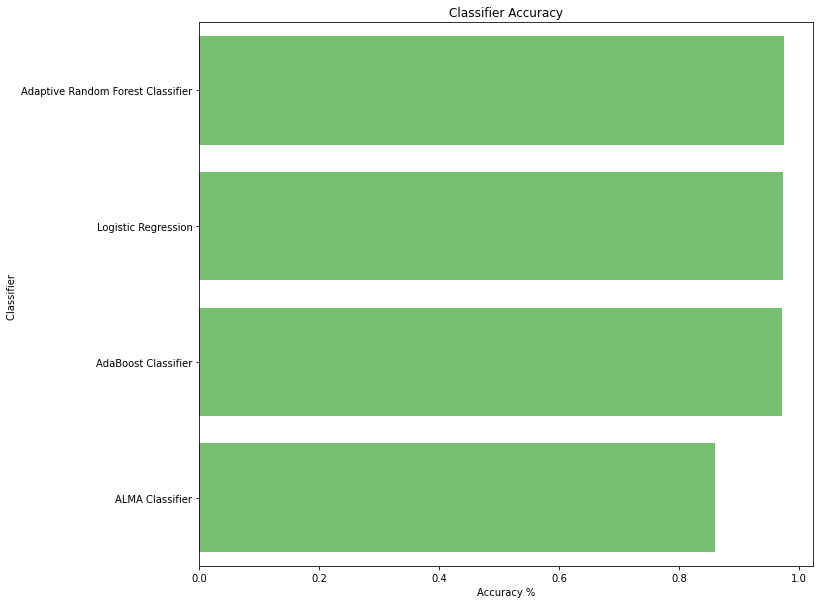

In [103]:
#plotting classifiers and thier accuracy
import seaborn as sns
sns.set_color_codes('muted')
sns.barplot(x='Accuracy', y='Classifier', data=ca, color='g')
plt.xlabel('Accuracy %')
plt.ylabel('Classifier ')
plt.title('Classifier Accuracy')
plt.show()

In [106]:
test = {'account_age': '195', 'avs': '6555', 'amount': '17000', 'card_number': '8221', 'location': 'Kwekwe', 'account_type': 'Credit', 'bank': 'Steward bank', 'transaction_time': '244', 'connection_type': 'http', 'cvv': 'n', 'broswer': 'Mozilla/5.0', 'gender': 'female', 'entry_type': 'chip', 'account_balance': '347', 'holder_age': '56'}
test_pred = model1.predict_proba_one(test)
test_pred
if test_pred[True]> test_pred[False]:
    pred = True
else:
    pred= False
{'class': pred, 'score':test_pred[pred], 'message':'classification successful'}

{'class': False,
 'score': 0.9886658025394554,
 'message': 'classification successful'}

# HYPERPARAMETER TUNING
> in-order to improve the overal perfomance of the model. To be perfomed using grid search 

In [107]:
import joblib
joblib.dump(model1,'transaction_classifier.pkl')

['transaction_classifier.pkl']